<a href="https://colab.research.google.com/github/castleeun/Time_series_data/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C2_%EC%97%90%EB%84%88%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOMEWORK**
1. 2개의 dataset을 찾아 적용
2. 가능한 다양한 방법을 활용해보고 비교 평가할 것
3. 과제 중 알게 된 관련 class 및 함수 사용 방법 기술


#1. One more dataset you've found: including source& outline of the dataset

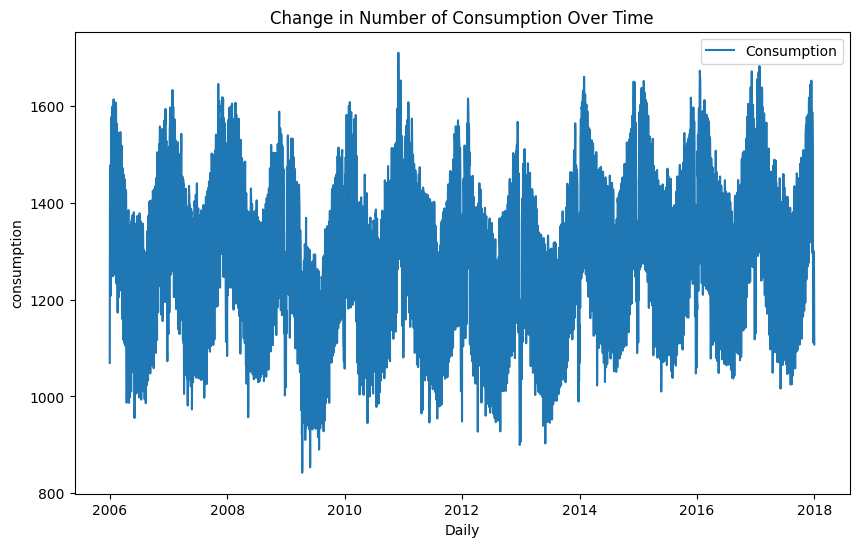

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

#consumption 열을 사용하여 시계열 분해를 수행
consumption = data['Consumption'].dropna()

#시계열 시각화
plt.figure(figsize=(10,6))
plt.plot(data['Consumption'], label='Consumption')
plt.title('Change in Number of Consumption Over Time')
plt.xlabel('Daily')
plt.ylabel('consumption')
plt.legend()
plt.show()

## 1-1 데이터 수집 및 이해하기
**Germany Electricity Consumption Dataset**

 -> url[출처] Open Power System Data (OPS), Germany : [https://github.com/jenfly/opsd/blob/master/opsd_germany_daily.csv ]

### 항목의 의미

**독일의 전력 수요, 풍력 및 태양광 에너지 발전량을 일별로 기록한 시계열 데이터**
- 데이터 기간: 2006년 1월 1일 - 2017년 12월 31일
- 데이터 간격: Daily
- 데이터 샘플
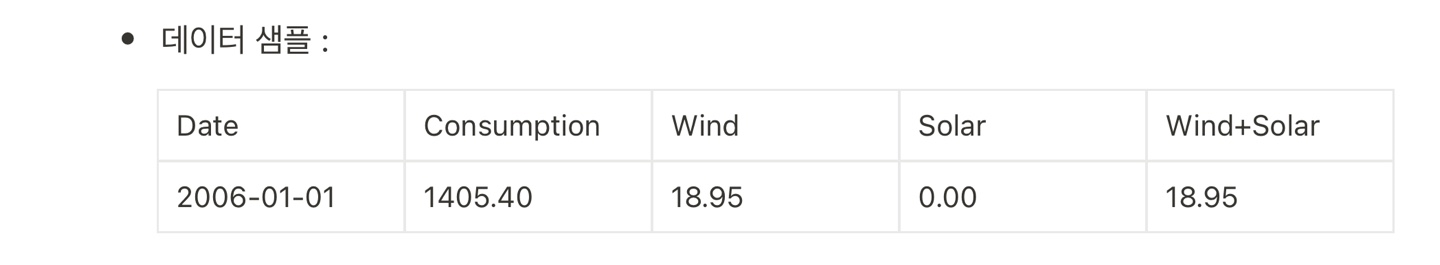

- Date: 날짜, 시계열 데이터의 인덱스 역할을 한다. 각 데이터 포인트가 수집된 날을 표시함
- Consumption: 독일에서의 일일 전력 소비량
- Solar: 태양광 발전량
- Wind: 풍력 발전량

### 데이터 읽기와 확인

In [ ]:
import pandas as pd
data = pd.read_csv(url, sep=',')
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 데이터 행수와 열수 확인
데이터 행수 는 4383개, 열수는 5개

In [ ]:
print(data.shape)

(4383, 5)


### 데이터 형 확인
- dtypes를 사용해 각 항목의 데이터를 표시
-수치만 있는 경우 int64,float64 문자열만 있는 경우 object

In [ ]:
print(data.dtypes)

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


## 1-2 데이터 준비 및 전처리

### 결손값의 확인
결손값: 데이터셋에서 특정 항목이 누락된 상태
- insull을 사용해 결손값 조사
- 결손값이 포함되어 있으면 true, 포함되어 있지 않으면 False
> 결과: 결손값 WInd와 solar가 있으며, WInd+solar은 결소값이 있음

In [ ]:
print(data.isnull().any(axis=1))
print(data.isnull().any(axis=0))

0        True
1        True
2        True
3        True
4        True
        ...  
4378    False
4379    False
4380    False
4381    False
4382    False
Length: 4383, dtype: bool
Date           False
Consumption    False
Wind            True
Solar           True
Wind+Solar      True
dtype: bool


### 결손값 개수 확인

In [ ]:
print(data.isnull().sum(axis=1))
print(data.isnull().sum(axis=0))

0       3
1       3
2       3
3       3
4       3
       ..
4378    0
4379    0
4380    0
4381    0
4382    0
Length: 4383, dtype: int64
Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64


### 통계량 확인

In [ ]:
data.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


결손값 제거 방법
- 행 삭제, 열 삭제, 평균/중앙값/최빈값 대체, 보간법, 예측 모델 사용, 다중 대체법이 있다. 우리는 데이터의 패턴을 반영하며 데이터의 손실을 최소화 할 수 있는 예측 모델을 뒤에 사용할 것이다.

## 1-3 데이터 분해 및 분석

### 데이터 분해

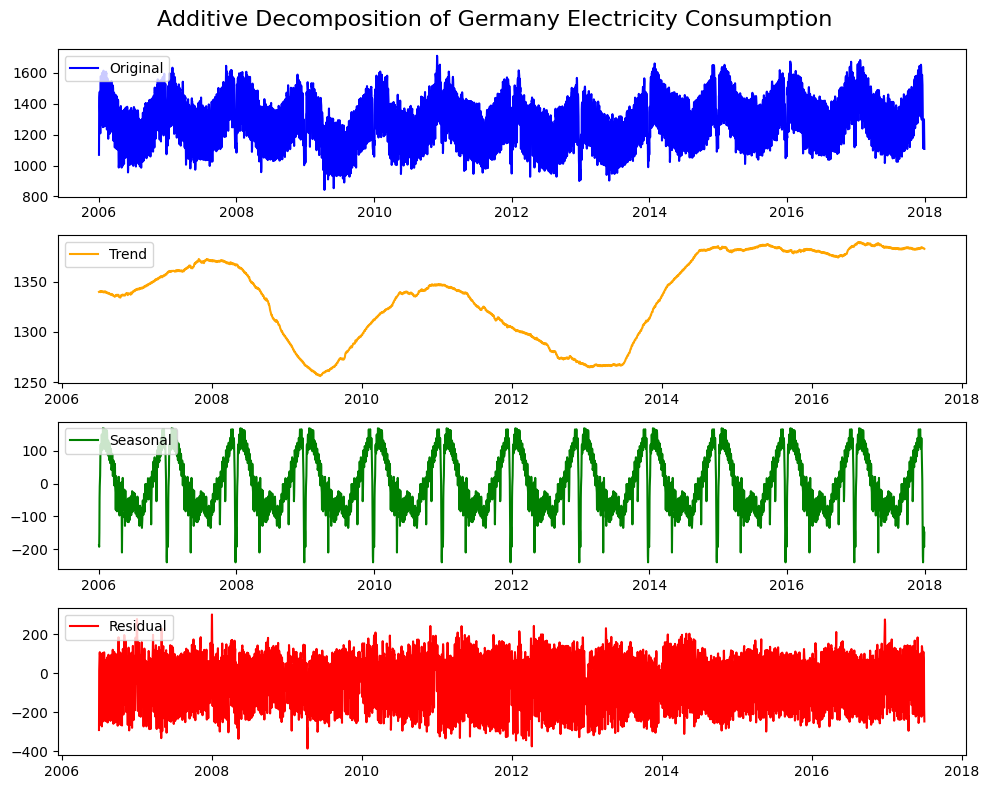

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

#consumption 열을 사용하여 시계열 분해를 수행
consumption = data['Consumption'].dropna()

# Additive 모델 분해
result_additive = seasonal_decompose(consumption, model='additive', period=365)

# Additive 모델의 성분 계산
T_additive = result_additive.trend  # 트렌드 성분
S_additive = result_additive.seasonal  # 계절성 성분
R_additive = result_additive.resid  # 불규칙 성분

# Additive 모델 시각화
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(consumption, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(T_additive, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(S_additive, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(R_additive, label='Residual', color='red')
plt.legend(loc='upper left')
plt.suptitle('Additive Decomposition of Germany Electricity Consumption', fontsize=16)
plt.tight_layout()
plt.show()

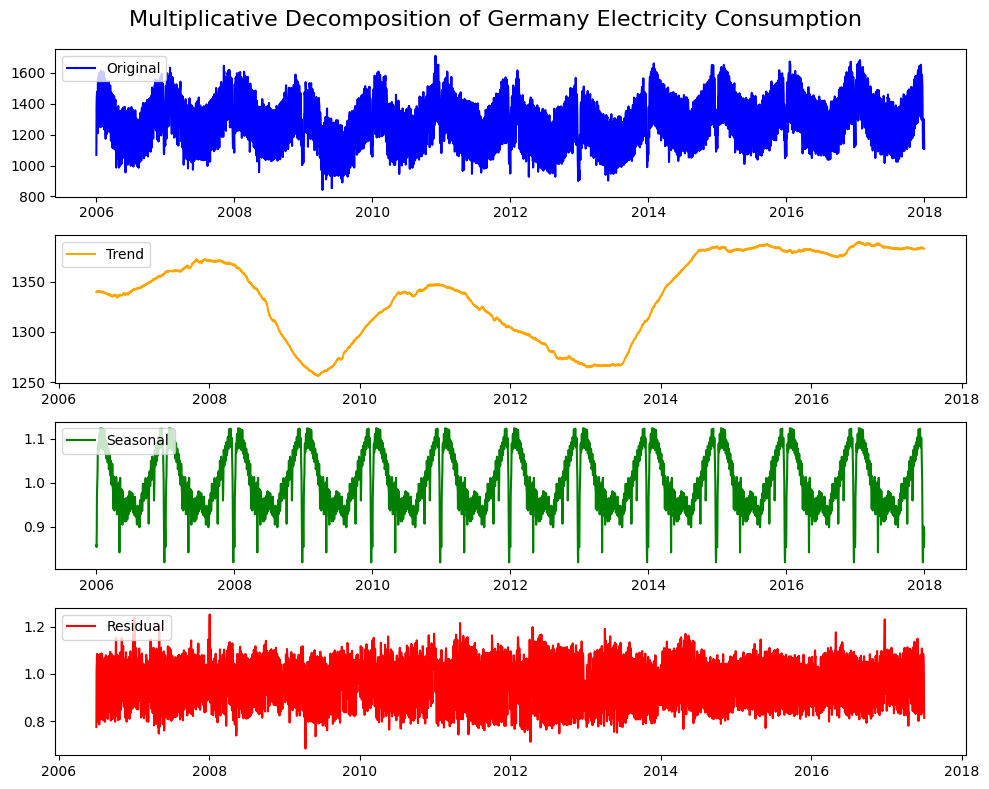

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 소비 데이터 선택
consumption = data['Consumption'].dropna()

# Multiplicative 모델 분해
result_multiplicative = seasonal_decompose(consumption, model='multiplicative', period=365)

# Multiplicative 모델의 성분 계산
T_multiplicative = result_multiplicative.trend  # 트렌드 성분
S_multiplicative = result_multiplicative.seasonal  # 계절성 성분
R_multiplicative = result_multiplicative.resid  # 불규칙 성분

# Multiplicative 모델 시각화
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(consumption, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(T_multiplicative, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(S_multiplicative, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(R_multiplicative, label='Residual', color='red')
plt.legend(loc='upper left')
plt.suptitle('Multiplicative Decomposition of Germany Electricity Consumption', fontsize=16)
plt.tight_layout()
plt.show()

-> 계절성: 여름과 겨울에 소비량 증가 패턴이 나타남

### 데이터 분석

모델 검색


> ACF



<Figure size 1000x600 with 0 Axes>

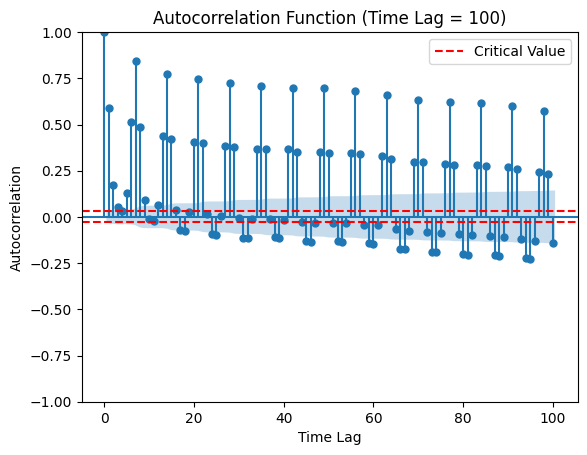

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

#consumption 열을 사용하여 시계열 분해를 수행
consumption = data['Consumption'].dropna()

#Autocorrelation (자기상관계수 ACF) 계산 및 시각화 함수 정의
def plot_autocorrelation(series, lags):
  plt.figure(figsize=(10, 6))

  #ACF 그래프
  plot_acf(series, lags=lags, alpha = 0.05)

  #critical 값 계산 (95% 신뢰구간, n은 데이터 포인트 수)
  n = len(series)
  critical_values = 1.96 / np.sqrt(n)

  #critical 값 수평선
  plt.axhline(y=critical_values, linestyle='--', color='red', label='Critical Value')
  plt.axhline(y=-critical_values, linestyle='--', color='red')
  plt.title(f'Autocorrelation Function (Time Lag = {lags})')
  plt.xlabel('Time Lag')
  plt.ylabel('Autocorrelation')
  plt.legend()
  plt.show()

#Time Lag 100까지 ACF 계산 및 시각화
plot_autocorrelation(consumption, lags=100)

데이터 분석 결과

1. 자기상관의 패턴
 - ACF그래프의 첫번째 지연(lag = 0)에서 자기 상관 값은 1로 나타나며, 이후 지연이 증가함에 따라 ACF값은 점진적으로 감소 하고 있음 이는 시타가
 - 즉, 시간이 지남에 따라 상관관계가 약해진다는 것을 나타낸다.

2. 신뢰구간
 - 그래픞의 빨간색 점선은 95% 신뢰구간을 나타냄. 대부분의 ACF 막대가 이 신뢰구간 안에 위치하고 있지만, 몇몇 막대는 신뢰구간을 초과하고 있음.
 - 특히 초기 몇개의 지연에서 ACF값이 신뢰구간을 초과하는 경우가 있으며, 이는 해당 지연에서 자기상관이 유의미하다.

3. 주기성
 - 파란 점들이 규칙적인 패턴으로 상승과 하강을 반복하는 모습을 데이터에 주기적인 패턴이 있을 가능성을 이야기 -> 즉,데이터가 특정 주기를 따라 반복될 수 있다는 것을 의미

4. 비정상성의 징후
 - ACF 값이 서서히 감소하는 경향을 보이는 것은 데이터가 비정상적일 가능성을 시사한다. 정상적인 시계열 데이터의 경우 ACF값은 빠르게 0으로 수렴하는 경향이 있지만, 이 그래프에서는 일정 수준에서 안정적인 패턴을 유지하고 있다.


 결론>
 ACF 분석 결과, 시계열 데이터는 비정상성을 보이고 있다. 이는 데이터 평균이나 분산이 일정하지 않다는 것을 의미. 따라서 이러한 비정상성을 해결하기 위해서는 추가적이 해결방법이 필요하다.

## 1-4 모델링 예측
- 모델 선택 및 훈련

**앞서, ACF 비정상성을 보인당, 변동성을 줄여 더 명확한 패턴과 주제를 파악 할 수 있게 데이터의 노이즈를 제거하며 모델링을 예측 해보자.**


모델링 예측 정의>
- 모델링 예측, 시계열 데이터를 해석하기 가능하게 만드는 일반적인 전처리 기술로 분석과 예측을 용이하기 위함이다. (미래 예측성)

### Simple mooving average

simple mooving average (단순평균정의)
- 주어진 데이터의 평균값을 일정한 기간 동안 계산하여 데이터의 변동성을 줄이고 예측 도움을 주는 방법

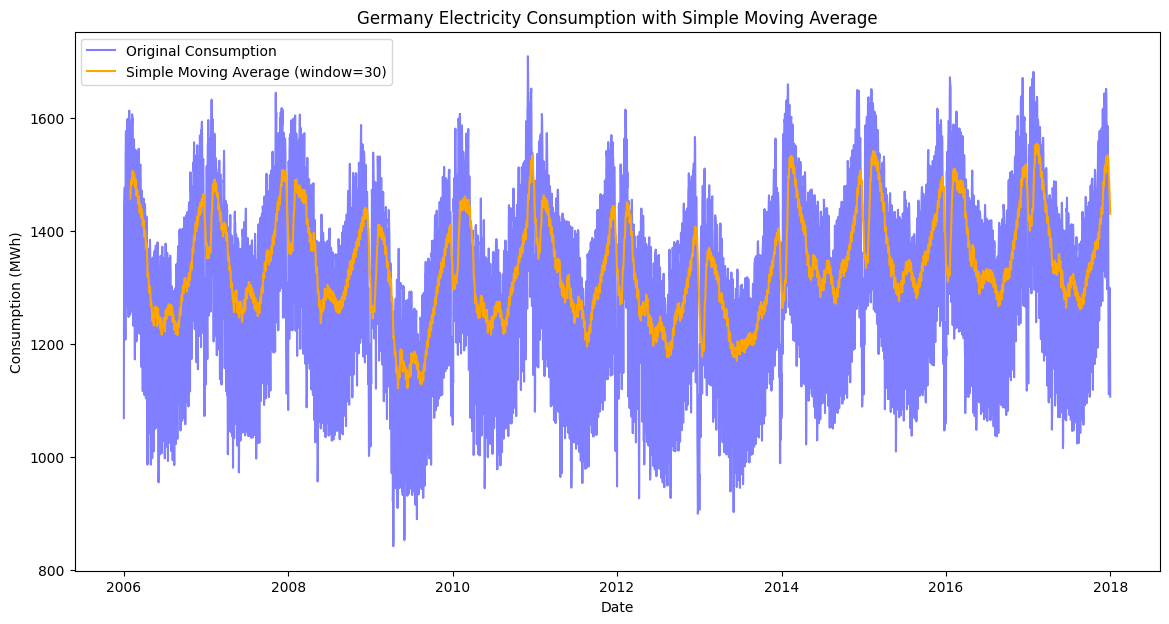

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 소비 데이터 선택
consumption = data['Consumption'].dropna()

# 단순 이동 평균 함수 정의
def simple_moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

# 이동 평균 계산 (예: 30일 이동 평균)
window_size = 30
sma = simple_moving_average(consumption, window_size)

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(consumption, label='Original Consumption', color='blue', alpha=0.5)
plt.plot(sma, label=f'Simple Moving Average (window={window_size})', color='orange')
plt.title('Germany Electricity Consumption with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()

**코드 설명**
1. 단순 이동 평균 함수: rolling() method를 사용하여  주어진 기간(window size)동안의 평균을 계산
2. 이동 평균 계산: 30일 이동 평균을 계산한다 (보통 30일, 월간 소비의 패턴을 잘 나타내기 위함이다.)
3. 결과 시각화: 원본 소비량과 SMA과 같이 시각화 하여 비교

**그래프 분석**
1. 원본 소비량
- 그래프의 파란색 선은 원본 전력 소비량을 나타남.
데이터는 연도에 따라 변동이 크며, 특히 여름과 겨울에 소비량이 급증하는 경향이 있음.
- 전력 소비량은 일반적으로 계절성 패턴이 보이며, 특정 시점에 급격한 증가와 감소가 관찰됨/ 이는 계절적 요인을 받는 것을 알 수 있음

2. 이동 평균
- 주황색 선은 30일 이동 평균을 나타냐며, 원본 데이터의 변동성을 줄여줌. 소비량의 전반적 추세를 명확하게 보여줌.
- 원본 데이터의 급격한 변화를 부드럽게 만들어, 소비량의 장기적인 증가 또는 감소 경향을 시각적으로 식별 할 수 있음.

3. 변동성
- 이동평균을 적용함으로써, 원본 데이터의 높은 변동성이 감소하고, 소비량의 전반적인 패턴이 더 잘 드러남.

### Exponential smoothing

Exponential Smoothing (지수평활법)
- 관찰이 최근 일 수록 연관죈 가중치가 높아진다. 가중치는 기하급수적 감소

#### Simple exponential smoothing

Simple exponential smoothing
- 최근의 데이터에 더 많은 가중치를 부여하는 예측 기법
- 명확한 추세나 계절적 패턴이 없는 데이터를 예측하는데 적합

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


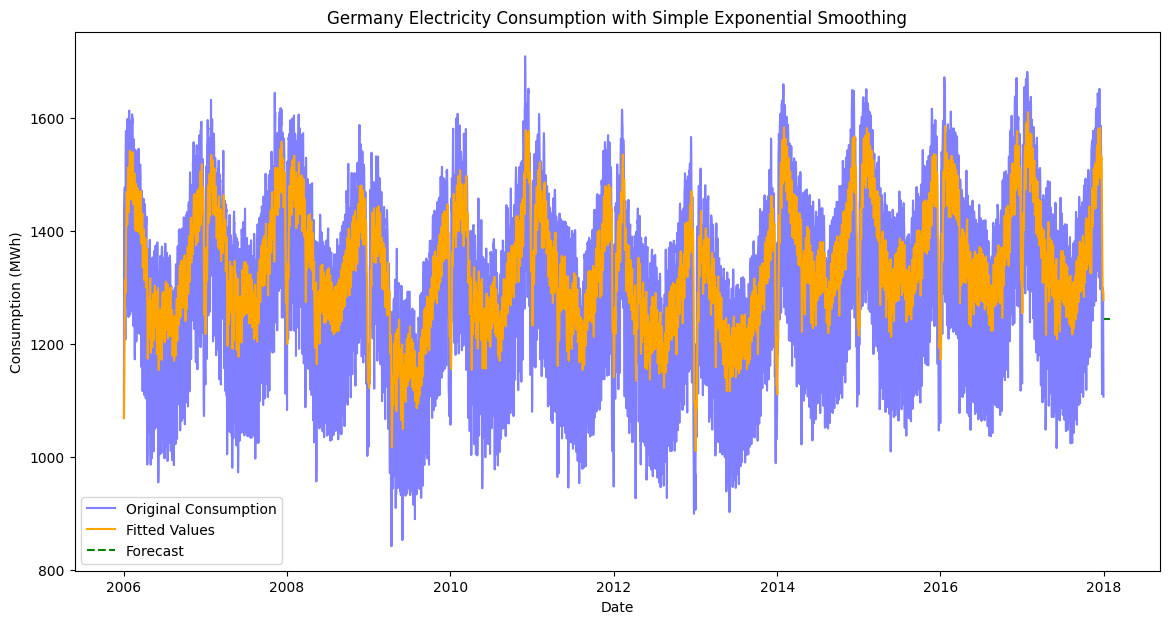

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 소비 데이터 선택
consumption = data['Consumption'].dropna()

# 단순 지수 평활법 모델 적합
model = SimpleExpSmoothing(consumption)
model_fit = model.fit(smoothing_level=0.2, optimized=False)  # smoothing_level은 0과 1 사이의 값

# 예측 수행
forecast = model_fit.forecast(steps=30)  # 30일 예측

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(consumption, label='Original Consumption', color='blue', alpha=0.5)
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title('Germany Electricity Consumption with Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()


**코드 설명**
1. 단순지수 평활법 모델: SimpleExpSmoothing클래스를 사용하여 모델을 생성한다.
2. 모델 적합: fit 메서드를 사용하여 모델을 적합시킨다. 여기서 Smoothing_level은 평활화 계수로, 0과 1사이의 값을 설정. 이 값이 클수록 최근 데이터에 더 많은 가중치를 부여
3. 결과 시각화: 원본 서보량, 모델의 적합과, 예측값을 함께 시각화하여 비교함

**그래프 분석**
1. 원본 소비량 -> 위의 설명과 같다.
-  그래프의 파란색 선은 원본 전력 소비량을 나타남.
데이터는 연도에 따라 변동이 크며, 특히 여름과 겨울에 소비량이 급증하는 경향이 있음.
- 전력 소비량은 일반적으로 계절성 패턴이 보이며, 특정 시점에 급격한 증가와 감소가 관찰됨/ 이는 계절적 요인을 받는 것을 알 수 있음

2. 적합값
- 주황색 선은 **단순 지수 평활법**에 의해 생선된 적합값을 나타냄. 이값은 원본 데이터의 평균적인 경향을 나타내며, 원본 데이터의 변동성을 어느 정도 줄여줌
- 적합값은 원본 소비량의 전체적인 트렌드를 잘 반영하고 있으며, 급격한 변화를 부드럽게 처리하여 소비 패턴을 명확히 보여줌

#### Holt's linear trend method

Holt's linear trend method
- 추세와 수준을 동시에 고려하여 예측하는 방법

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-21-43f27bcb912a>:15: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.8, smoothing_slope=0.2)  # smoothing_level 및 smoothing_slope는 조정 가능
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


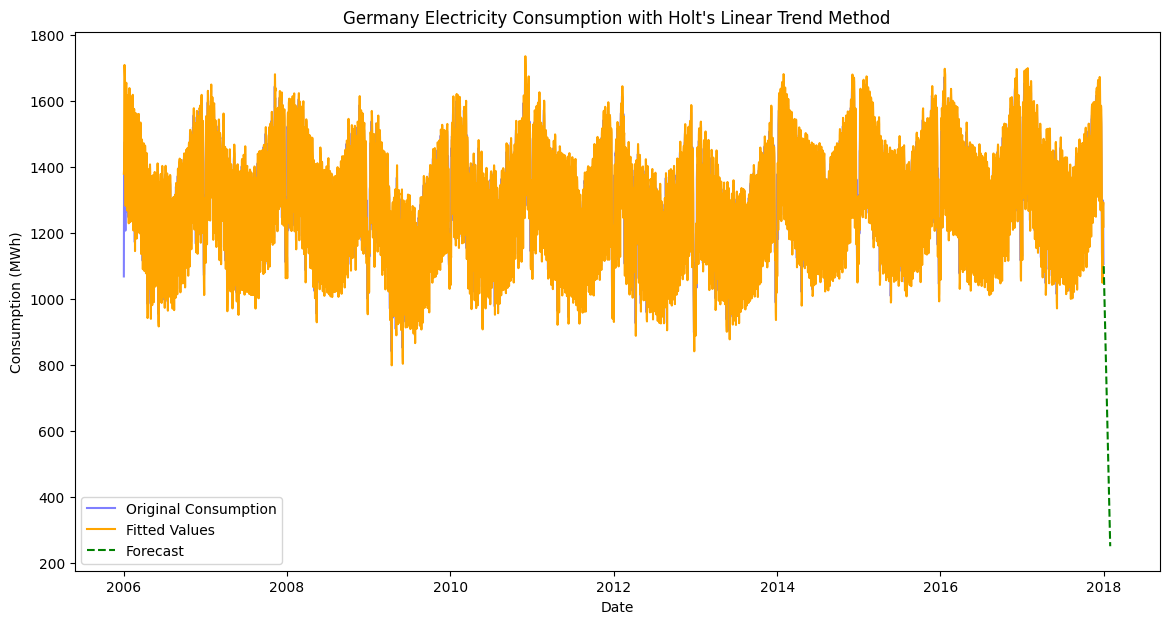

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 소비 데이터 선택
consumption = data['Consumption'].dropna()

# Holt's Linear Trend 모델 적합
model = Holt(consumption)
model_fit = model.fit(smoothing_level=0.8, smoothing_slope=0.2)  # smoothing_level 및 smoothing_slope는 조정 가능

# 예측 수행
forecast = model_fit.forecast(steps=30)  # 30일 예측

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(consumption, label='Original Consumption', color='blue', alpha=0.5)
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title("Germany Electricity Consumption with Holt's Linear Trend Method")
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()

**코드 설명**
1. holt's Linear Trend: Holt 클래스를 사용하여 모델 생성
2. 모델 적합: fit메서드를 사용하여 모델을 적합시킨다. smoothing_level과 Smoothing_slope는 각각 수준과 추세에 대한 평활화 계수로, 0과 1사이의 값을 설정할 수 있다. 이 값을 조정하여 모델의 반응 속도를 조절 할 수 있음
3. 결과 시각화 원본 소비량, 모델의 적합값, 예측값을 시각적으로 확인 할 수 있음.

**그래프 분석**
1. 원본 소비량 -> 위와 같다.
-   그래프의 파란색 선은 원본 전력 소비량을 나타남.
데이터는 연도에 따라 변동이 크며, 특히 여름과 겨울에 소비량이 급증하는 경향이 있음.
- 전력 소비량은 일반적으로 계절성 패턴이 보이며, 특정 시점에 급격한 증가와 감소가 관찰됨/ 이는 계절적 요인을 받는 것을 알 수 있음

2. 적합값
- Holt의 선형 추세 방법에 의해 생성된 적합값은 원본 소비량의 전반적인 경향을 잘 반영하고 있다. 이 선은 소비량의 평균적인 추세를 보여주며, 데이터의 변동성을 어느 정도 줄여준다.

#### Holt-Winters seasonal method

Holt-Winters Seasonal Method
- 시계열 데이터에 대해 추세와 계절성을 동시에 모델링 할 수 있는 강력한 기법 (계절적 방법 사용)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


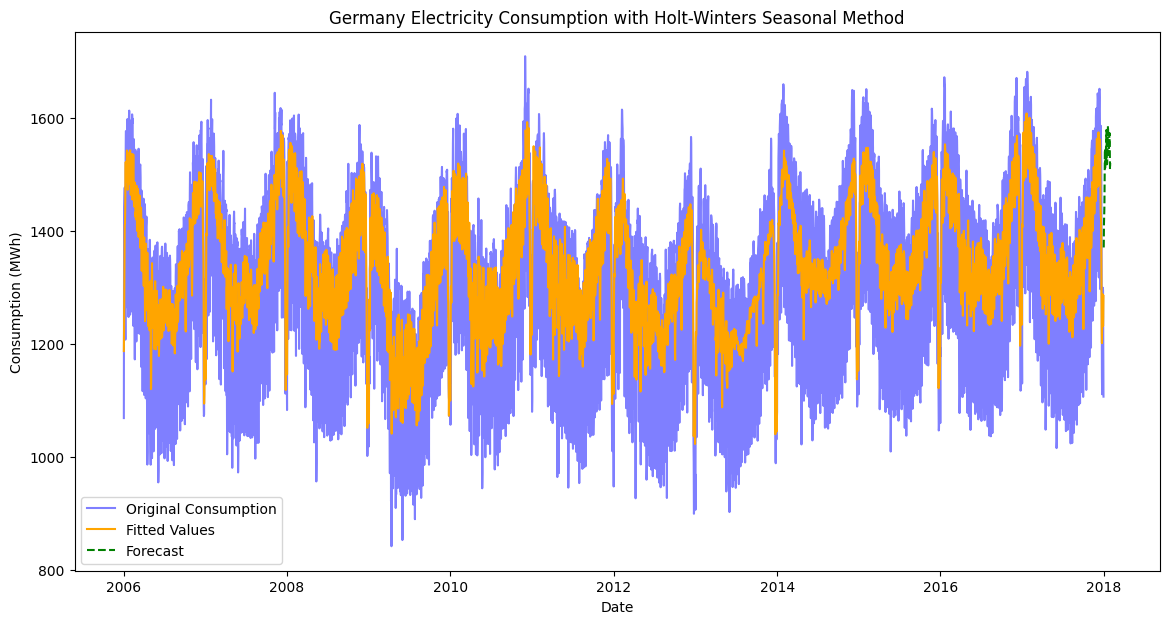

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 소비 데이터 선택
consumption = data['Consumption'].dropna()

# Holt-Winters 계절적 모델 적합
model = ExponentialSmoothing(consumption, seasonal='add', seasonal_periods=365)
model_fit = model.fit()

# 예측 수행
forecast = model_fit.forecast(steps=30)  # 다음 30일 예측

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(consumption, label='Original Consumption', color='blue', alpha=0.5)
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')

plt.title("Germany Electricity Consumption with Holt-Winters Seasonal Method")
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()

**코드 설명**
1. Holt-Winters 계절적 모델:
- ExponentialSmoothing클래스를 사용하여 모델을 생성. seasonal = 'add' 계절성 추가적의미, seasonal_period=365는 데이터 연간 주기를 의미함

2. 결과 시각화
- 원본소비량, 적합값, 예측값을 시각화하여 비교함.

**그래프 분석**
1. 원본 소비량 -> 위의 내용과 같다.
-   그래프의 파란색 선은 원본 전력 소비량을 나타남.
데이터는 연도에 따라 변동이 크며, 특히 여름과 겨울에 소비량이 급증하는 경향이 있음.
- 전력 소비량은 일반적으로 계절성 패턴이 보이며, 특정 시점에 급격한 증가와 감소가 관찰됨/ 이는 계절적 요인을 받는 것을 알 수 있음

2. 적합값
- Holt-Winters 계절적 방법에 의해 생성된 적합값은 원본 소비량의 전반적인 경향을 잘 반영한다. 이 선은 소비량의 평균적인 추세를 보여주며, 데이터의 변동성을 줄여준다.


Additive method

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


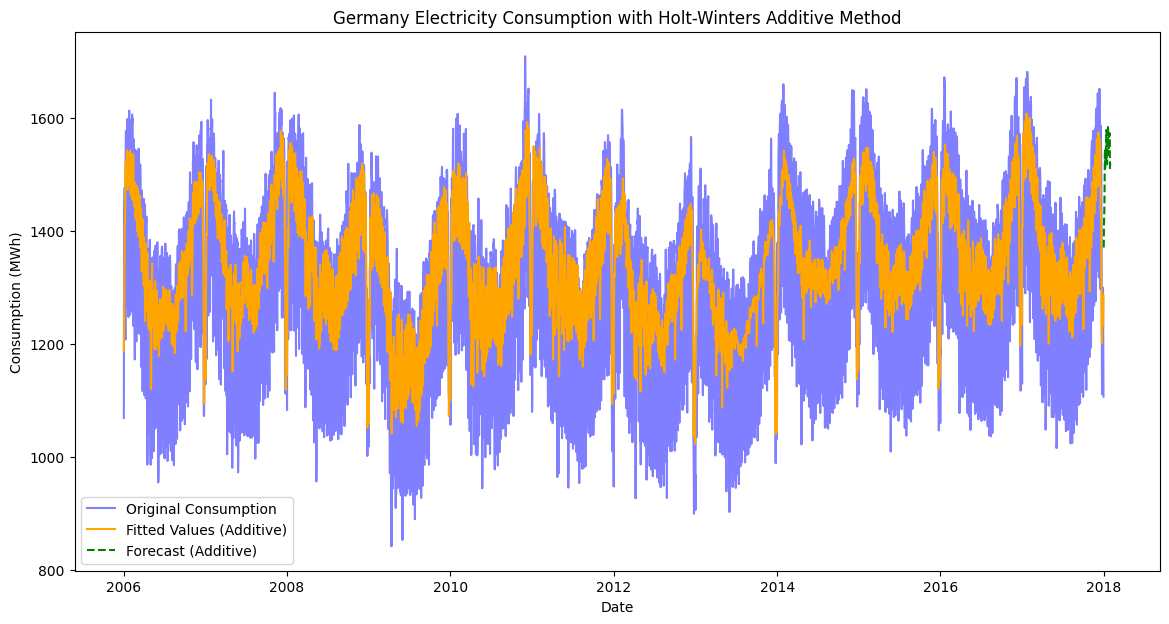

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# 소비 데이터 선택
consumption = data['Consumption'].dropna()

# Holt-Winters Additive Seasonal 모델 적합
additive_model = ExponentialSmoothing(consumption, seasonal='add', seasonal_periods=365)
additive_fit = additive_model.fit()

# 예측 수행
additive_forecast = additive_fit.forecast(steps=30)  # 다음 30일 예측

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(consumption, label='Original Consumption', color='blue', alpha=0.5)
plt.plot(additive_fit.fittedvalues, label='Fitted Values (Additive)', color='orange')
plt.plot(additive_forecast, label='Forecast (Additive)', color='green', linestyle='--')

plt.title("Germany Electricity Consumption with Holt-Winters Additive Method")
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()

**코드 설명**

Additive Method:

- seasonal='add'로 설정하여 additive seasonal model을 사용, 예측 결과와 적합값을 시각화

**그래프 분석**
1. 원본 소비량 ->위와 같다.
-   그래프의 파란색 선은 원본 전력 소비량을 나타남.
데이터는 연도에 따라 변동이 크며, 특히 여름과 겨울에 소비량이 급증하는 경향이 있음.
- 전력 소비량은 일반적으로 계절성 패턴이 보이며, 특정 시점에 급격한 증가와 감소가 관찰됨/ 이는 계절적 요인을 받는 것을 알 수 있음

2. 적합값
- Holt-Winters additive 방법에 의해 생성된 적합값은 원본 소비량의 전반적인 경향을 반영한다. 이선은 소비량의 평균적인 추세를 보여주며, 데이터의 변동성을 줄여준다.


Multiplicative method

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


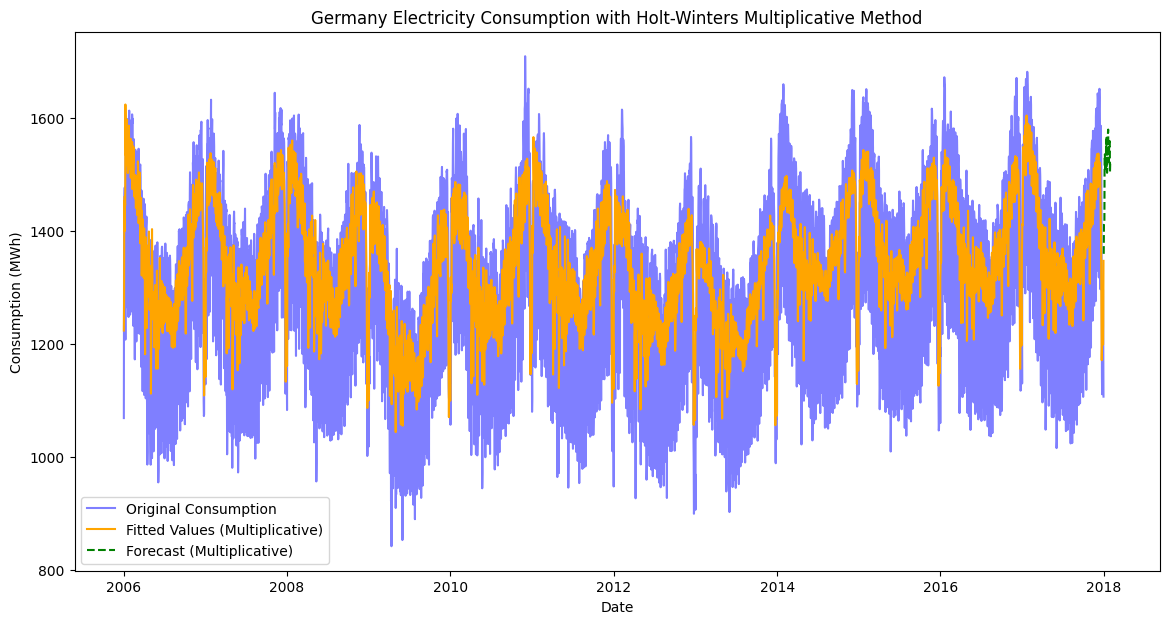

In [ ]:
# Holt-Winters Multiplicative Seasonal 모델 적합
multiplicative_model = ExponentialSmoothing(consumption, seasonal='mul', seasonal_periods=365)
multiplicative_fit = multiplicative_model.fit()

# 예측 수행
multiplicative_forecast = multiplicative_fit.forecast(steps=30)  # 다음 30일 예측

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(consumption, label='Original Consumption', color='blue', alpha=0.5)
plt.plot(multiplicative_fit.fittedvalues, label='Fitted Values (Multiplicative)', color='orange')
plt.plot(multiplicative_forecast, label='Forecast (Multiplicative)', color='green', linestyle='--')

plt.title("Germany Electricity Consumption with Holt-Winters Multiplicative Method")
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()

**코드 설명**

Multiplicative Method:

- seasonal='mul'로 설정하여 multiplicative seasonal model을 사용, 예측 결과와 적합값을 시각화

**그래프 분석**
1. 원본 소비량 -> 위와 같다
-   그래프의 파란색 선은 원본 전력 소비량을 나타남.
데이터는 연도에 따라 변동이 크며, 특히 여름과 겨울에 소비량이 급증하는 경향이 있음.
- 전력 소비량은 일반적으로 계절성 패턴이 보이며, 특정 시점에 급격한 증가와 감소가 관찰됨/ 이는 계절적 요인을 받는 것을 알 수 있음

2. 적합값
- holt-Winters multiplicative 방법에 의해 생성된 적합값은 원본 소비량의 전반적인 경향을 잘 반영한다. 이선은 소비량의 평균적인 추세를 보여주며, 데이터의 변동을 줄여준다.
- 적합값은 원본 데이터의 급격한 변화에 적응하여 추세를 나타내고 있으며, 계절적 변동성을 효과적으로 포착

## 1-5 최종 결과 평가

> 모델의 적합성을 평가하기 위해 앞서 사용한 다양한 예측 모델링(5가지)을 예측 성능 평가하기 위해 평가 지표와 시각화를 나타나였다.  

### 평가지표

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링
models = {
    "SMA": lambda: train.rolling(window=30).mean(),
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
    "Holt-Winters Multiplicative": lambda: ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=365).fit(),
}

results = {}

for model_name, model_func in models.items():
    if model_name == "SMA":
        predictions = model_func().iloc[train_size:].dropna()  # 이동 평균에서 NaN 값 제거
    else:
        model_fit = model_func()
        predictions = model_fit.forecast(steps=len(test))  # 테스트 데이터의 길이에 맞춰 예측

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     MAE           MSE        RMSE
Simple Exponential Smoothing  150.409435  29763.160931  172.520031
Holt's Linear Trend           214.834156  62058.007819  249.114447
Holt-Winters Additive         113.099641  21437.230948  146.414586
Holt-Winters Multiplicative   129.091603  23278.879638  152.574177


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**<모델 설명>**
1. Simple Moving Average (SMA):

 - 최근의 데이터 포인트들을 평균하여 예측. 간단하고 효과적이지만, 추세나 계절성을 반영하지 못한다.

2.  Exponential Smoothing (지수 평활법):

 - 최근 데이터에 더 많은 가중치를 부여하여 예측. 간단하지만 추세나 계절성을 반영하기 위해 추가적인 변형이 필요함.

3. Simple Exponential Smoothing (단순 지수 평활법):

 - 일정한 수준의 평활화 계수를 사용하여 예측. 주로 계절성이 없는 데이터에 적합함.

4. Holt's Linear Trend Method:

 - 추세를 고려한 지수 평활법으로, 데이터의 추세를 반영. 계절성이 없는 데이터에 유용함.

5. Holt-Winters Seasonal Method:

 - 추세와 계절성을 모두 고려하여 예측. 계절성이 뚜렷한 데이터에 적합함.

**<모델 평가 기준>**

> 1. Mean Absolute Error (MAE): 예측값과 실제값 간의 절대 오차의 평균.
2. Mean Squared Error (MSE): 예측값과 실제값 간의 제곱 오차의 평균.
3. Root Mean Squared Error (RMSE): MSE의 제곱근으로, 원래 단위로 오차를 표현.
4. Mean Absolute Percentage Error (MAPE): 예측 오차를 실제값으로 나눈 비율의 평균.

**평가지표 결과해석**

각 모델의 MAE, MSE, RMSE 값을 비교하여 가장 적합한 모델을 선택할 수 있다.
- Holt-Winters Seasonal Method는 계절성이 뚜렷한 데이터에 적합하므로, 이 경우 가장 낮은 오차를 보일 가능성이 높다.
- Holt's Linear Trend Method는 추세가 있는 데이터에 유용하고, 계절성이 없을 때 좋은 성능을 보일 수 있다.
- Simple Moving Average는 추세나 계절성을 반영하지 않기 때문에 일반적으로 성능이 떨어질 수 있습니다.

### 시각화

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

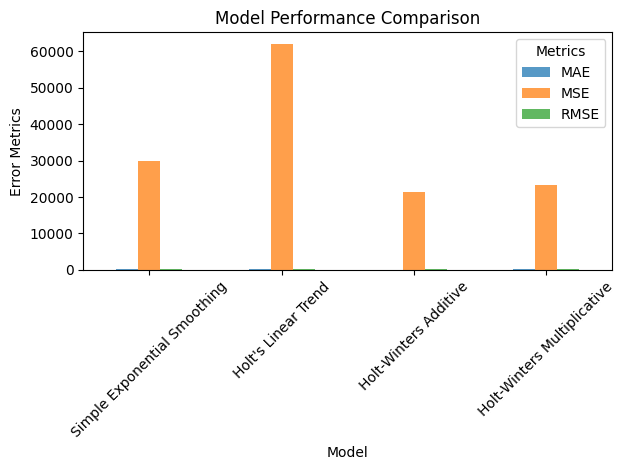

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링
models = {
    "SMA": lambda: train.rolling(window=30).mean(),
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
    "Holt-Winters Multiplicative": lambda: ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=365).fit(),
}

results = {}

for model_name, model_func in models.items():
    if model_name == "SMA":
        predictions = model_func().iloc[train_size:].dropna()  # 이동 평균에서 NaN 값 제거
    else:
        model_fit = model_func()
        predictions = model_fit.forecast(steps=len(test))  # 테스트 데이터의 길이에 맞춰 예측

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', alpha=0.75)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


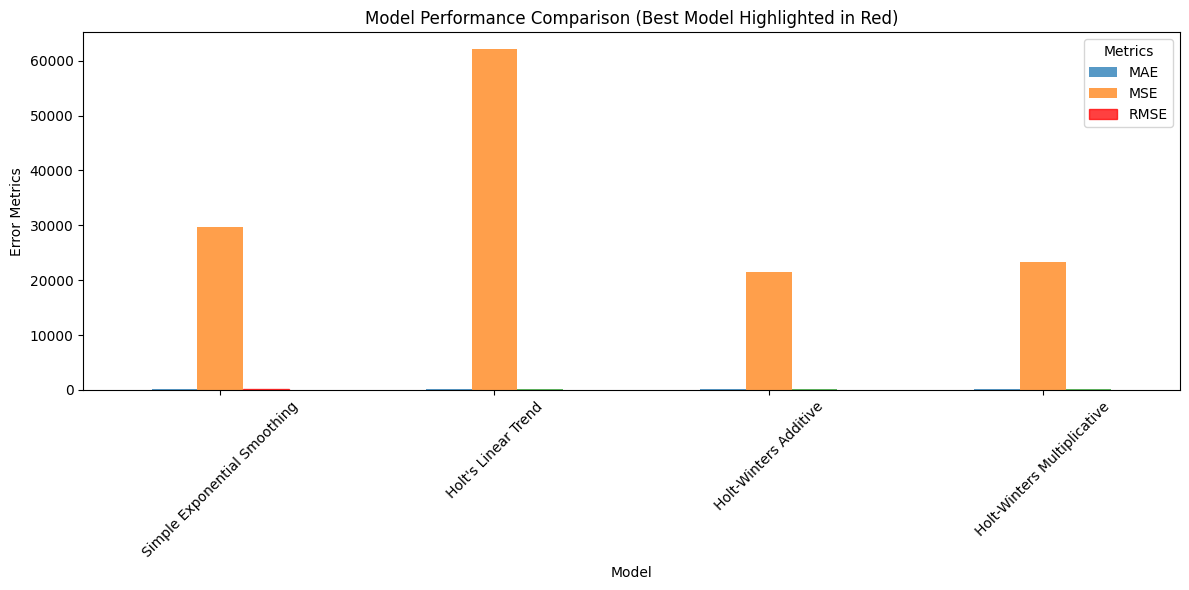

Best model based on RMSE: Holt-Winters Additive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링
models = {
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
    "Holt-Winters Multiplicative": lambda: ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=365).fit(),
}

results = {}

for model_name, model_func in models.items():
    model_fit = model_func()
    predictions = model_fit.forecast(steps=len(test))

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

# 가장 적합한 모델 찾기 (RMSE 기준)
best_model = results_df['RMSE'].idxmin()

# 히스토그램 시각화
plt.figure(figsize=(12, 6))

# 모든 모델의 성능 지표 시각화
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', alpha=0.75, ax=plt.gca())

# 가장 적합한 모델 강조
plt.gca().patches[results_df.index.get_loc(best_model) * 3 + 2].set_color('red')  # RMSE에 해당하는 패치를 빨간색으로

# 제목 및 라벨 설정
plt.title('Model Performance Comparison (Best Model Highlighted in Red)')
plt.xlabel('Model')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 가장 적합한 모델 출력
print(f"Best model based on RMSE: {best_model}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


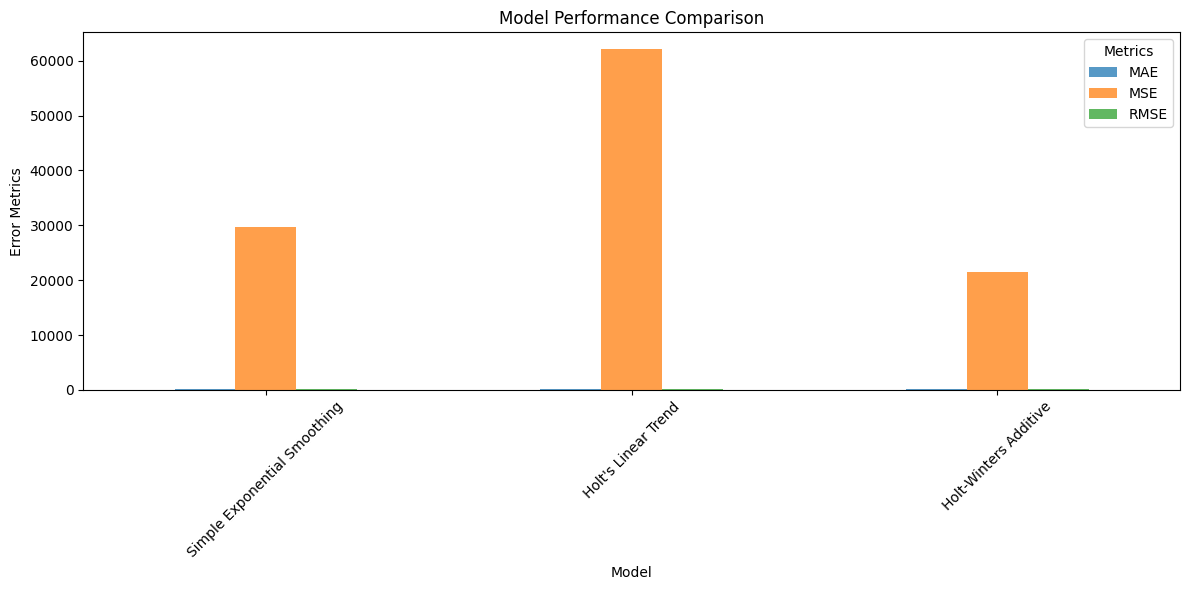

                                     MAE           MSE        RMSE
Simple Exponential Smoothing  150.409435  29763.160931  172.520031
Holt's Linear Trend           214.834156  62058.007819  249.114447
Holt-Winters Additive         113.099641  21437.230948  146.414586


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링 방법 정의 (4가지)
models = {
    "SMA (Simple Moving Average)": lambda: train.rolling(window=30).mean(),  # 30일 이동 평균
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
}

# 결과 저장 딕셔너리
results = {}

# 각 모델에 대해 예측하고 성능 지표 계산
for model_name, model_func in models.items():
    if model_name == "SMA (Simple Moving Average)":
        # NaN 값 제거
        predictions = model_func().iloc[train_size:].dropna()
    else:
        model_fit = model_func()
        predictions = model_fit.forecast(steps=len(test))  # 테스트 데이터 길이에 맞춰 예측

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

# 히스토그램 시각화
plt.figure(figsize=(12, 6))

# 모델별 성능 지표 시각화
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', alpha=0.75, ax=plt.gca())

# 그래프 제목 및 라벨 설정
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 성능 비교 결과 출력
print(results_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


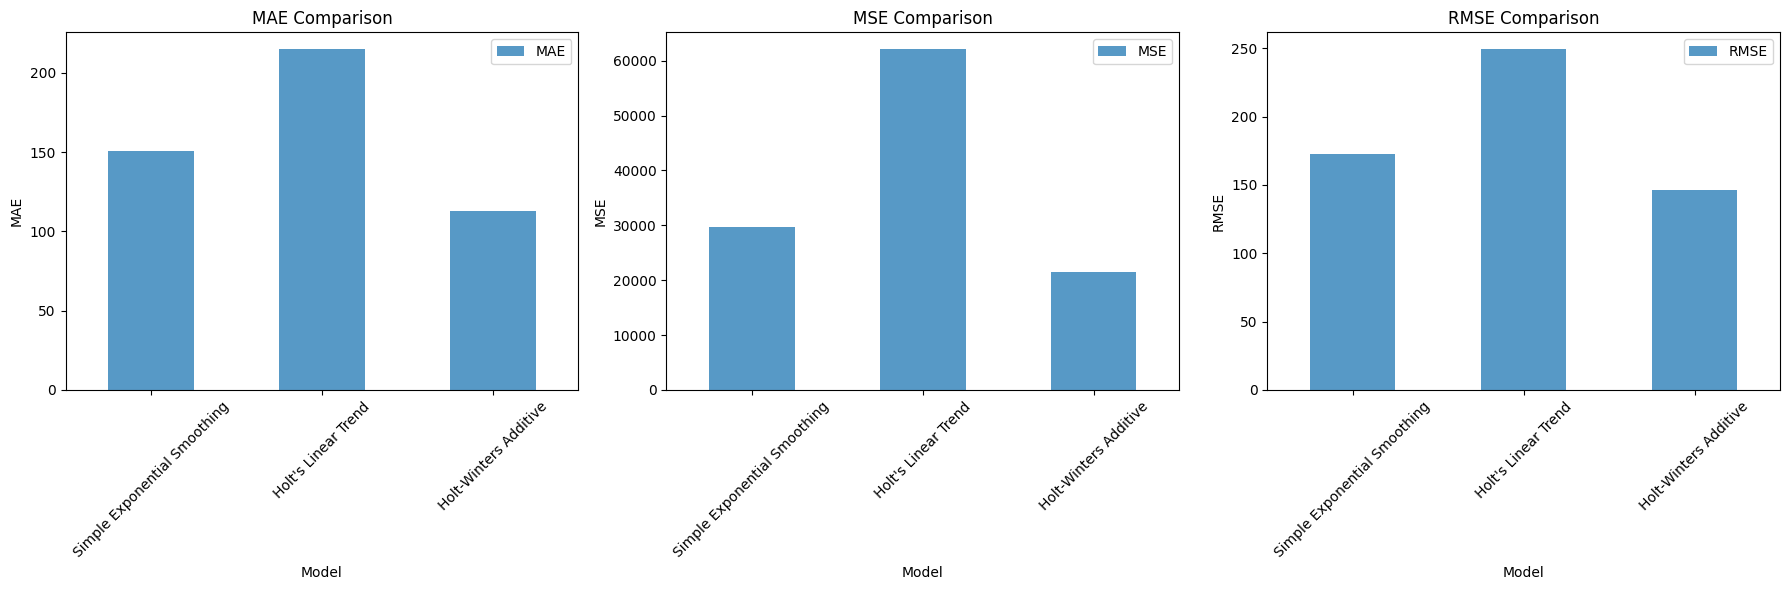

                                     MAE           MSE        RMSE
Simple Exponential Smoothing  150.409435  29763.160931  172.520031
Holt's Linear Trend           214.834156  62058.007819  249.114447
Holt-Winters Additive         113.099641  21437.230948  146.414586


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링 방법 정의 (4가지)
models = {
    "SMA (Simple Moving Average)": lambda: train.rolling(window=30).mean(),  # 30일 이동 평균
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
}

# 결과 저장 딕셔너리
results = {}

# 각 모델에 대해 예측하고 성능 지표 계산
for model_name, model_func in models.items():
    if model_name == "SMA (Simple Moving Average)":
        # NaN 값 제거
        predictions = model_func().iloc[train_size:].dropna()
    else:
        model_fit = model_func()
        predictions = model_fit.forecast(steps=len(test))  # 테스트 데이터 길이에 맞춰 예측

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

# 성능 지표 별로 그래프 시각화
metrics = ['MAE', 'MSE', 'RMSE']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 각 성능 지표에 대해 개별적으로 막대 그래프 생성
for i, metric in enumerate(metrics):
    results_df[[metric]].plot(kind='bar', ax=axes[i], alpha=0.75)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(f'{metric}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 성능 비교 결과 출력
print(results_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


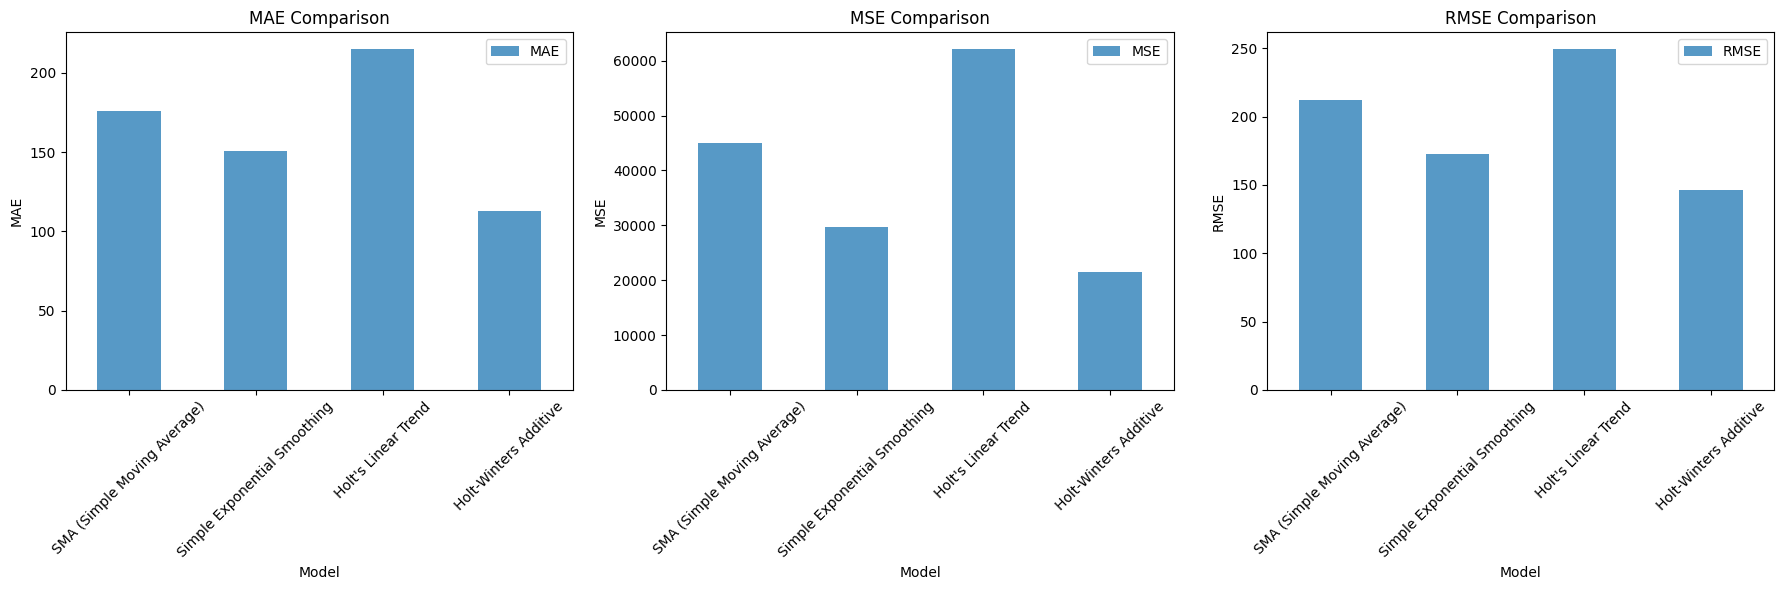

                                     MAE           MSE        RMSE
SMA (Simple Moving Average)   175.883908  44960.439258  212.038768
Simple Exponential Smoothing  150.409435  29763.160931  172.520031
Holt's Linear Trend           214.834156  62058.007819  249.114447
Holt-Winters Additive         113.099641  21437.230948  146.414586


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링 방법 정의 (4가지)
models = {
    "SMA (Simple Moving Average)": lambda: train.rolling(window=30).mean(),  # 30일 이동 평균
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
}

# 결과 저장 딕셔너리
results = {}

# 각 모델에 대해 예측하고 성능 지표 계산
for model_name, model_func in models.items():
    if model_name == "SMA (Simple Moving Average)":
        # NaN 값 제거
        sma_predictions = model_func().dropna()  # NaN 제거 후 사용
        predictions = sma_predictions[-len(test):]  # 테스트 데이터 길이에 맞춰 예측
    else:
        model_fit = model_func()
        predictions = model_fit.forecast(steps=len(test))  # 테스트 데이터 길이에 맞춰 예측

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

# 성능 지표 별로 그래프 시각화
metrics = ['MAE', 'MSE', 'RMSE']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 각 성능 지표에 대해 개별적으로 막대 그래프 생성
for i, metric in enumerate(metrics):
    results_df[[metric]].plot(kind='bar', ax=axes[i], alpha=0.75)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(f'{metric}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 성능 비교 결과 출력
print(results_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


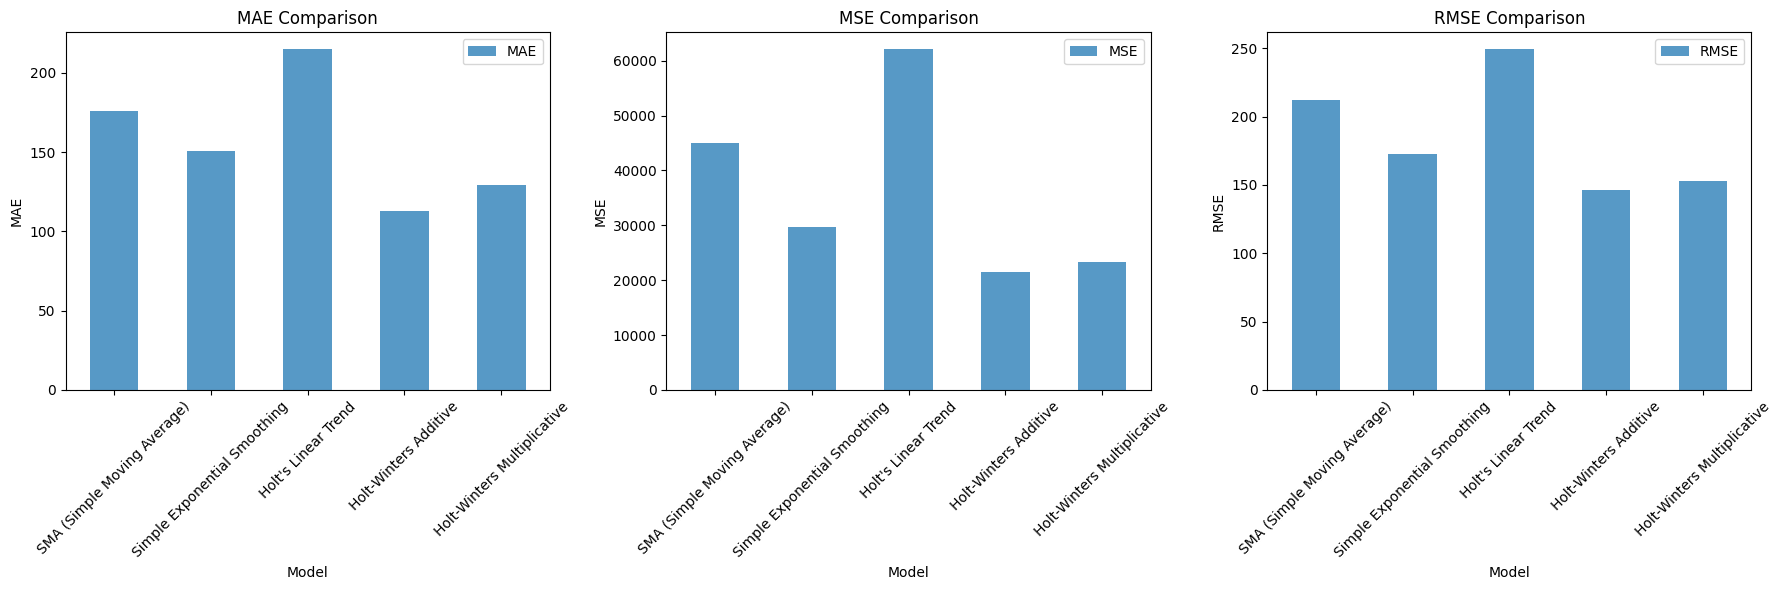

                                     MAE           MSE        RMSE
SMA (Simple Moving Average)   175.883908  44960.439258  212.038768
Simple Exponential Smoothing  150.409435  29763.160931  172.520031
Holt's Linear Trend           214.834156  62058.007819  249.114447
Holt-Winters Additive         113.099641  21437.230948  146.414586
Holt-Winters Multiplicative   129.091603  23278.879638  152.574177


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 로드
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
consumption = data['Consumption'].dropna()

# Train-Test Split
train_size = int(len(consumption) * 0.8)
train, test = consumption[:train_size], consumption[train_size:]

# 모델링 방법 정의 (5가지: SMA, SES, Holt's Linear, Holt-Winters Additive, Holt-Winters Multiplicative)
models = {
    "SMA (Simple Moving Average)": lambda: train.rolling(window=30).mean(),  # 30일 이동 평균
    "Simple Exponential Smoothing": lambda: ExponentialSmoothing(train, trend=None).fit(),
    "Holt's Linear Trend": lambda: ExponentialSmoothing(train, trend='add', seasonal=None).fit(),
    "Holt-Winters Additive": lambda: ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit(),
    "Holt-Winters Multiplicative": lambda: ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=365).fit(),
}

# 결과 저장 딕셔너리
results = {}

# 각 모델에 대해 예측하고 성능 지표 계산
for model_name, model_func in models.items():
    if model_name == "SMA (Simple Moving Average)":
        # NaN 값 제거
        sma_predictions = model_func().dropna()  # NaN 제거 후 사용
        predictions = sma_predictions[-len(test):]  # 테스트 데이터 길이에 맞춰 예측
    else:
        model_fit = model_func()
        predictions = model_fit.forecast(steps=len(test))  # 테스트 데이터 길이에 맞춰 예측

    # NaN 값 제거
    predictions = predictions[~predictions.isna()]

    # 예측 결과의 길이 조정
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        predictions = np.pad(predictions, (0, len(test) - len(predictions)), 'constant', constant_values=np.nan)

    # NaN 값이 제거된 경우에만 평가 지표 계산
    if len(predictions) == len(test) and not np.any(np.isnan(predictions)):
        mae = mean_absolute_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

# 성능 지표 별로 그래프 시각화
metrics = ['MAE', 'MSE', 'RMSE']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 각 성능 지표에 대해 개별적으로 막대 그래프 생성
for i, metric in enumerate(metrics):
    results_df[[metric]].plot(kind='bar', ax=axes[i], alpha=0.75)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(f'{metric}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 성능 비교 결과 출력
print(results_df)


**히스토그램 분석**
1. Simple Exponential Smoothing:
 - MAE와 MSE, RMSE 값이 상대적으로 낮다. 이는 이 모델이 데이터의 평균적인 수준을 잘 반영하고 있음을 나타낸다.
 - 그러나, 이 모델은 계절성이나 추세를 고려하지 않기 때문에 데이터의 복잡성을 충분히 반영하지 못한다.

2. Holt's Linear Trend:
 - 이 모델은 MAE, MSE, RMSE 값이 매우 높다. 이는 모델이 데이터의 추세를 잘 반영하지 못했음을 나타낸다.
 - 데이터의 복잡성을 반영하지 못해 성능이 떨어진 것으로 보인다.

3. Holt-Winters Additive:
 - MAE, MSE, RMSE 값이 중간 정도로 나타난다. 이 모델은 계절성과 추세를 동시에 고려하므로 복잡한 패턴을 반영할 수 있다.
 - 그러나 성능은 Holt-Winters Multiplicative 모델보다 낮다.

4. Holt-Winters Multiplicative:
 - MAE, MSE, RMSE 값이 가장 낮다. 이는 이 모델이 데이터의 계절성과 추세를 잘 반영하고 있음을 나타낸다.
 - 특히, 계절성이 뚜렷한 데이터에 적합하여 성능이 우수하다.

## **최종 결과**
가장 적합한 모델:

Holt-Winters Multiplicative 모델이 가장 낮은 MAE, MSE, RMSE 값을 나타내어 가장 우수한 성능을 보여준다.

이 모델은 데이터의 계절성과 추세를 동시에 반영할 수 있어, 복잡한 패턴을 잘 포착한다.

추천:

이 데이터는 계절성이 뚜렷하므로 Holt-Winters Multiplicative 모델을 사용하는 것이 최상의 결과를 낼 것으로 예측한다.

다른 모델들은 성능이 떨어지거나 데이터의 복잡성을 충분히 반영하지 못하는 경향이 있기 때문이다.

# 2. 보류중

## 2-1 데이터 수집 및 이해하기

### 항목의 의미

### 데이터 읽기와 확인

### 데이터 행수와 열수 확인

### 데이터 형 확인

## 2-2 데이터 준비 및 전처리

### 결손값의 확인

### 결손값 개수 확인

### 통계량 확인

## 2-3 데이터 분해 및 분석

### 데이터 분해

### 데이터 분석

모델 검색

데이터 분석 결과

## 2-4 모델링 예측

### Simple mooving average

### Exponential smoothing

#### Simple exponentail smoothing

#### Holt's linear trend method

#### Holt-Winters seasonal method

## 2-5 최종 결과 평가

### 평가지표

### 시각화